In [ ]:
pip install python-terrier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 37.0 MB/s 
     |████████████████████████████████| 69 kB 5.8 MB/s 
     |████████████████████████████████| 303 kB 49.2 MB/s 
     |████████████████████████████████| 46 kB 1.2 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 38.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 126 kB 46.0 MB/s 
     |████████████████████████████████| 72 kB 955 kB/s 
     |████████████████████████████████| 294 kB 54.6 MB/s 
     |████████████████████████████████| 285 kB 42.8 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.1-py3-none-any.whl size=104091 sha256=05833552edfcd711208f1a226b2630c46b46805dac369

In [ ]:
import pyterrier as pt


In [ ]:
pt.init()

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
qrels_path=("/content/drive/MyDrive/IRDM/podcasts_2020_train.1-8.qrels")
qrels = pt.io.read_qrels(qrels_path)

In [ ]:
qrels['label']=qrels['label'].apply(lambda x: "Perfect" if x==4 else ("Excellent" if x==3 else ("Good" if x==2 else ("Fair" if x==1 else "Bad"))))

In [ ]:
hj=qrels.groupby(["qid","label"]).count().unstack(level=1).reset_index()
hj.columns = ['_'.join(col) for col in hj.columns.values]
hj.columns=[col.split('_')[1] for col in hj.columns.values]
hj.rename(columns={"":'Topic'},inplace=True)

In [ ]:
topics = pt.io.read_topics("/content/drive/MyDrive/IRDM/topic01.xml",format="trecxml")


In [ ]:
topics.rename(columns={"qid":"Topic"},inplace=True)


In [ ]:
import pandas as pd

In [ ]:
pd.merge(topics,hj, on="Topic",how="left").fillna(0).to_csv("training_topics.csv")

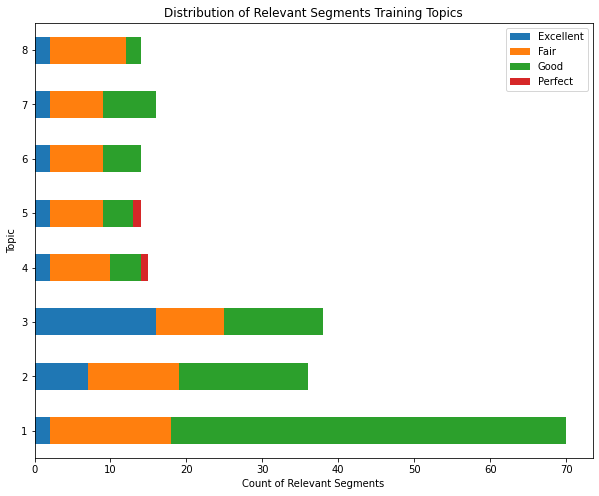

In [ ]:
hj.drop('Bad',axis=1).set_index('Topic').plot(kind="barh",stacked=True,figsize=(10,8))
plt.xlabel("Count of Relevant Segments")
plt.ylabel("Topic")
plt.title("Distribution of Relevant Segments Training Topics")
plt.savefig("Training_topics.png")

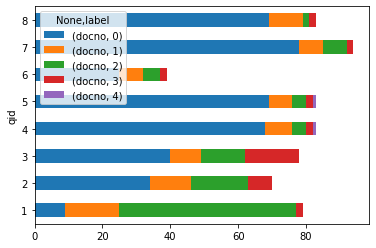

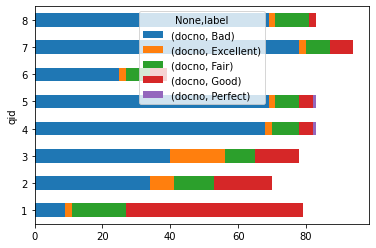

In [ ]:
hj.set_index('qid').plot(kind="barh",stacked=True)

In [ ]:
qrels_path=("/content/drive/MyDrive/IRDM/podcasts_2020_test.qrels")
qrels = pt.io.read_qrels(qrels_path)

In [ ]:
qrels['label']=qrels['label'].apply(lambda x: "Perfect" if x==4 else ("Excellent" if x==3 else ("Good" if x==2 else ("Fair" if x==1 else "Bad"))))

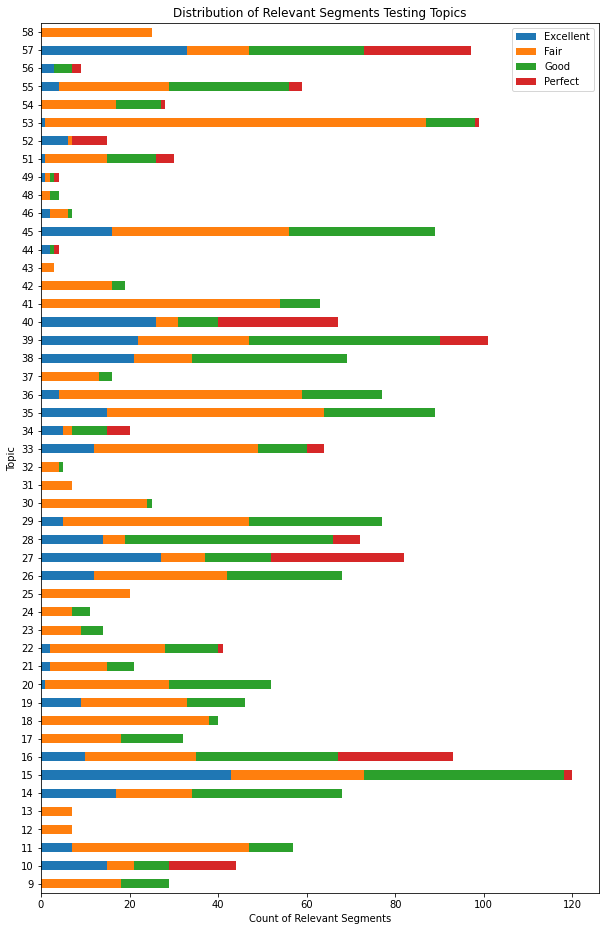

In [ ]:
hj=qrels.groupby(["qid","label"]).count().unstack(level=1).reset_index()
hj.columns = ['_'.join(col) for col in hj.columns.values]
hj.columns=[col.split('_')[1] for col in hj.columns.values]
hj.rename(columns={"":'Topic'},inplace=True)
hj["Topic"] =hj["Topic"].apply(lambda x: int(x))
hj.sort_values(by="Topic",inplace=True)
hj.drop('Bad',axis=1).set_index("Topic").plot(kind="barh",stacked=True, figsize=(10,16))
plt.xlabel("Count of Relevant Segments")
plt.ylabel("Topic")
plt.title("Distribution of Relevant Segments Testing Topics")
plt.savefig("Testing_topics.png")


In [ ]:
topics = pt.io.read_topics("/content/drive/MyDrive/IRDM/podcasts_2020_topics_test.xml",format="trecxml")


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hj=qrels.groupby(["qid","label"]).count().unstack(level=1).reset_index()
hj.columns = ['_'.join(col) for col in hj.columns.values]
hj.columns=[col.split('_')[1] for col in hj.columns.values]
hj.rename(columns={"":'Topic'},inplace=True)
topics = pt.io.read_topics("/content/drive/MyDrive/IRDM/podcasts_2020_topics_test.xml",format="trecxml")
topics.rename(columns={"qid":"Topic"},inplace=True)
jj=pd.merge(topics,hj, on="Topic",how="left").fillna(0)

In [ ]:
jj.to_csv("Testing_topics.csv")